# Parcial 2

Brayan Alejandro Murillo González - 1007338060





In [86]:
import numpy as np
import sympy as sp
import scipy as sc
import pandas as pd
from sympy import init_printing
from scipy import interpolate
import matplotlib.pylab as plt
from sympy import Symbol
from scipy import optimize
from scipy import integrate
import datetime 
from datetime import timedelta

In [87]:
data = pd.read_json('https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/Followers.json')
data

,followers,date_time,hours
0,42696,2021-08-04 22:06:53.668,0.000000
1,42706,2021-08-04 23:06:56.517,1.000791
2,42716,2021-08-05 00:06:59.505,2.001621
3,42734,2021-08-05 01:07:02.174,3.002363
4,42749,2021-08-05 02:07:04.854,4.003107
...,...,...,...
615,47452,2021-09-02 12:29:21.834,686.374491
616,47486,2021-09-02 19:59:32.801,693.877537
617,47491,2021-09-02 20:59:50.542,694.882465
618,47493,2021-09-02 21:59:59.345,695.884910


# Velocidad inicial y aceleración

el polinomio de interpolacion es:            2
-0.002438 t + 8.552 t + 4.276e+04


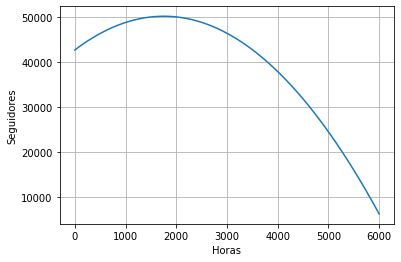

In [89]:
pf = np.polyfit(data["hours"],data["followers"],deg=2)  # Hacemos un Fit con los datos de horas y seguidores del dataframe

p = np.poly1d(pf,variable="t")   # Polinomio de interpolación con los coeficientes del fit

t=np.linspace(0,6000, 1000) # intervalo de horas para evaluar el polinomio de interpolación

""" Grafica del polinomio de interpolación"""
plt.plot(t,p(t))
plt.grid()
plt.xlabel("Horas")
plt.ylabel("Seguidores")
print("el polinomio de interpolacion es: %s"%(p))


El polinomio de interpolacion es:

$$-0.002\ t^2+8.552\ t+42760$$

Se sabe que la formula de caida libre es:
$$ y=y_0+v_0t+\frac{a}{2}t^2$$

por tanto en nuestro problema tenemos que:
$$\frac{a}{2}=-0.002 $$
$$v_0= 8.552$$
$$ y_0=42760 $$

Estos corresponden a las entradas de indice $[0],[1],[2]$ respectivamente para $\frac{a}{2},v_0,y_0$ dentro del polyfit

# Maximo de seguidores

El máximo de seguidores es de: 50262


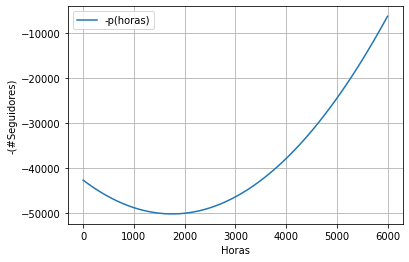

In [90]:

t = Symbol("t")

fm = sp.lambdify(t, -p(t), 'numpy') # Para convertir el polinomio de interpolacion en una función lambda

t=np.linspace(0,6000, 1000) 

""" Grafica del polinomio con signo negativo para identificar el intervalor donde se encuentra el "minimo" """
plt.plot(t,fm(t),label="-p(horas)")
plt.legend()
plt.xlabel("Horas")
plt.ylabel("-(#Seguidores)")
plt.grid()


min = optimize.fminbound(fm,1000,2000)  # Hora en la que se alcanza el máximo

print("El máximo de seguidores es de: %.0f" %( p(min))) # Maximo de seguidores

# Fecha donde se alcanza el maximo de seguidores

In [91]:
fecha_inicial=data["date_time"][0]  # Fecha inicial hours=0

print("La fecha inicial es : %s" %(fecha_inicial))

fecha_del_maximo=fecha_inicial+datetime.timedelta(hours=min) # Se suman las horas que transcurrieron hasta el máximo de seguidores a la fecha inicial

print("La fecha donde se alcanza el maximo de seguidores después de pasadas %f [horas] es: %s" %(min,fecha_del_maximo))

La fecha inicial es : 2021-08-04 22:06:53.668000
La fecha donde se alcanza el maximo de seguidores después de pasadas 1754.193168 [horas] es: 2021-10-17 00:18:29.072520


# Punto 2

Se tiene la integral:
$$
T=\frac{2 T_{0}}{\pi} \int_{0}^{\frac{\pi}{2}} \frac{d \phi}{\left(1-\sin ^{2} \frac{\alpha}{2} \sin ^{2} \phi\right)^{\frac{1}{2}}}
$$

Reescribiendo obtenemos: 
$$
\frac{T}{T_{0}}=\frac{2}{\pi} \int_{0}^{\frac{\pi}{2}} \frac{d \phi}{\left(1-\sin ^{2} \frac{\alpha}{2} \sin ^{2} \phi\right)^{\frac{1}{2}}}
$$

In [92]:

def fn(alpha):
  """
  Esta función recibe un alpha,
  lo remplaza en la función lambda y devuelve dicha función con un
  alpha específico
  """

  return lambda phi:(2/np.pi)*(1/((1-(np.sin(alpha/2)**2)*(np.sin(phi)**2))**0.5))



In [93]:
alpha = np.linspace(0,90,90).astype(int) # Valores de alpha enteros

a = 0       # Limites de la integral
b = np.pi/2

integ = np.zeros(len(alpha))  # Array para almacenar los valores del coeficiente


""" Ciclo para determinar cada función con su alpha especifico,
 luego determina la integral de cada función y los almacena e el array integ,
 dicha integral es el valor del coeficiente con el alpha especifico 
 """

for i in range (0,len(alpha)):
  f_ = fn(alpha[i])
  integ[i] = integrate.quad(f_,a,b)[0]

In [94]:
df=pd.DataFrame()  # Dataframe para almacenar los valores de amplitud y el coeficiente

df["Amplitud [Deg]"] = alpha              # Amplitud en Grados
df["Amplitud [Rad]"] = np.radians(alpha)  # Amplitud en radianes
df["T/T0"] = integ                        # Valor del coeficiente
df

,Amplitud [Deg],Amplitud [Rad],T/T0
0,0,0.000000,1.000000
1,1,0.017453,1.066334
2,2,0.034907,1.328904
3,3,0.052360,2.571234
4,4,0.069813,1.478815
...,...,...,...
85,85,1.483530,2.430536
86,86,1.500983,1.313679
87,87,1.518436,1.061456
88,88,1.535890,1.000078


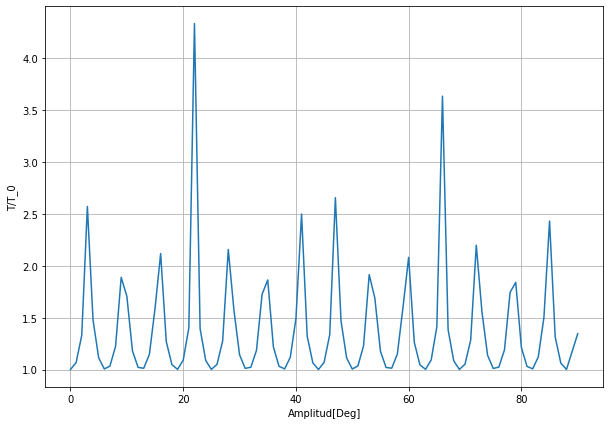

In [95]:
"""Grafica del coeficiente en función de la amplitud en grados"""

plt.figure(figsize = (10,7))
plt.plot(df["Amplitud [Deg]"],df["T/T0"])
plt.xlabel("Amplitud[Deg]")
plt.ylabel("T/T_0")
plt.grid()

Para $\alpha=0$ el valor $\frac{T}{T_0}=1$

Esto significa $T=T_0$ 
Es decir, como la amplitud es cero, el periodo con este $\alpha$ es exactamente el periodo cuando $\alpha$ toma valores pequeños